In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets
import torch.utils.data as data

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

True
1


In [38]:
import cv2
import PIL

In [5]:
x = cv2.imread("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/JPEGImages/2007_002024.jpg")

In [50]:
l = cv2.imread("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/SegmentationClass/2007_002024.png", 0)

In [65]:
lpil = PIL.Image.open("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/SegmentationObject/2007_002024.png")

In [66]:
nplp = np.asarray(lpil)

In [67]:
for i in nplp:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

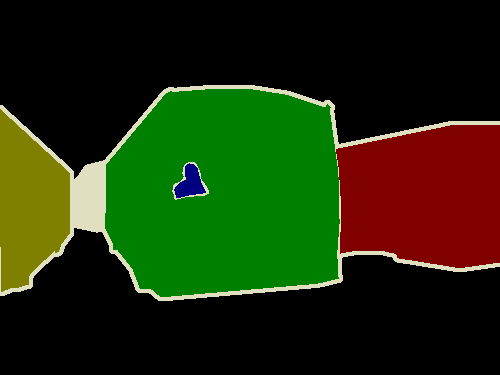

In [68]:
lpil

In [49]:
l[l == 255] = 0

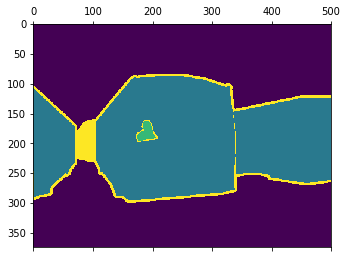

In [51]:
plt.matshow(l)

In [7]:
xpil = PIL.Image.open("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/JPEGImages/2007_002024.jpg")

In [8]:
x

array([[[188, 172, 155],
        [188, 172, 155],
        [189, 173, 156],
        ...,
        [217, 186, 153],
        [217, 186, 153],
        [215, 184, 151]],

       [[187, 171, 154],
        [187, 171, 154],
        [189, 173, 156],
        ...,
        [212, 181, 148],
        [213, 182, 149],
        [214, 183, 150]],

       [[186, 171, 152],
        [186, 171, 152],
        [188, 172, 155],
        ...,
        [209, 178, 145],
        [210, 179, 146],
        [214, 183, 150]],

       ...,

       [[122, 145, 160],
        [124, 145, 160],
        [116, 135, 150],
        ...,
        [120, 138, 149],
        [117, 135, 146],
        [118, 136, 147]],

       [[119, 142, 157],
        [121, 144, 159],
        [126, 147, 162],
        ...,
        [116, 134, 145],
        [110, 128, 139],
        [127, 145, 156]],

       [[108, 134, 148],
        [108, 131, 146],
        [118, 139, 154],
        ...,
        [108, 127, 135],
        [107, 126, 134],
        [136, 155, 163]]

In [9]:
np.asarray(xpil)

array([[[155, 172, 188],
        [155, 172, 188],
        [156, 173, 189],
        ...,
        [153, 186, 217],
        [153, 186, 217],
        [151, 184, 215]],

       [[154, 171, 187],
        [154, 171, 187],
        [156, 173, 189],
        ...,
        [148, 181, 212],
        [149, 182, 213],
        [150, 183, 214]],

       [[153, 170, 186],
        [153, 170, 186],
        [155, 172, 188],
        ...,
        [145, 178, 209],
        [146, 179, 210],
        [150, 183, 214]],

       ...,

       [[160, 145, 122],
        [160, 145, 124],
        [150, 135, 116],
        ...,
        [149, 138, 120],
        [146, 135, 117],
        [147, 136, 118]],

       [[157, 143, 117],
        [159, 144, 123],
        [162, 147, 128],
        ...,
        [145, 134, 116],
        [137, 129, 110],
        [154, 146, 127]],

       [[148, 134, 108],
        [146, 131, 108],
        [154, 139, 120],
        ...,
        [135, 127, 108],
        [134, 126, 107],
        [163, 155, 136]]

In [13]:
x_corr

array([[[155, 172, 188],
        [155, 172, 188],
        [156, 173, 189],
        ...,
        [153, 186, 217],
        [153, 186, 217],
        [151, 184, 215]],

       [[154, 171, 187],
        [154, 171, 187],
        [156, 173, 189],
        ...,
        [148, 181, 212],
        [149, 182, 213],
        [150, 183, 214]],

       [[152, 171, 186],
        [152, 171, 186],
        [155, 172, 188],
        ...,
        [145, 178, 209],
        [146, 179, 210],
        [150, 183, 214]],

       ...,

       [[160, 145, 122],
        [160, 145, 124],
        [150, 135, 116],
        ...,
        [149, 138, 120],
        [146, 135, 117],
        [147, 136, 118]],

       [[157, 142, 119],
        [159, 144, 121],
        [162, 147, 126],
        ...,
        [145, 134, 116],
        [139, 128, 110],
        [156, 145, 127]],

       [[148, 134, 108],
        [146, 131, 108],
        [154, 139, 118],
        ...,
        [135, 127, 108],
        [134, 126, 107],
        [163, 155, 136]]

In [10]:
x_corr = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

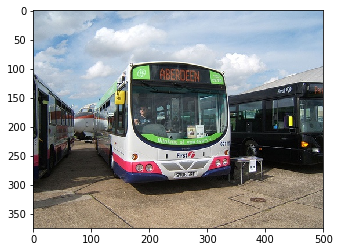

In [11]:
plt.imshow(x_corr)

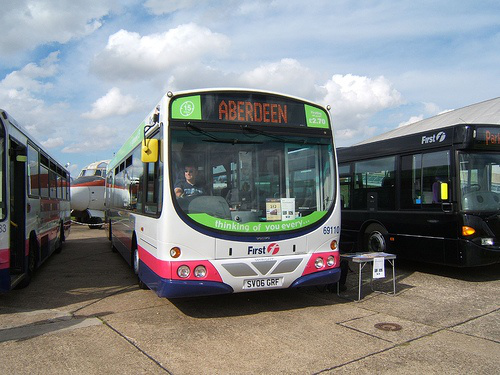

In [44]:
xpil

# Load the VOC2012 dataset

In [4]:
import ptsemseg
import ptsemseg.loader

In [5]:
data_loader = ptsemseg.loader.get_loader("pascal")

data_aug = None

t_loader = data_loader("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012",
                        is_transform=True,
                        split="train_aug",
                        img_size=("same", "same"),
                        augmentations=data_aug)


v_loader = data_loader("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012",
                        is_transform=True,
                        split="val",
                        img_size=("same", "same"),)

trainloader = data.DataLoader(t_loader,
                                  batch_size=1,
                                  num_workers=2,
                                  shuffle=True)

valloader = data.DataLoader(v_loader,
                                batch_size=1,
                                num_workers=2)

# evalmasks

In [16]:
xpil = PIL.Image.open("/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/JPEGImages/pre_encoded/")

IsADirectoryError: [Errno 21] Is a directory: '/srv/glusterfs/yardima/datasets/voc12/VOCdevkit/VOC2012/JPEGImages/'

In [25]:
torch.version.cuda

'9.0.176'

# Load the deeplab v2 model

In [7]:
import deeptriplet.models

In [8]:
resnet = deeptriplet.models.Res_Deeplab(NoLabels=21)

In [9]:
parameters = 0
for p in resnet.parameters():
    parameters += p.numel()

print("Number of parameters: {}".format(parameters))

Number of parameters: 44048532


In [10]:
pretrained_model_dict = torch.load("/srv/glusterfs/yardima/runs/pretrained-models/deeplabv2_resnet_voc12_20000.pth")
resnet.load_state_dict(pretrained_model_dict)

In [19]:
import os
s = os.environ['PATH']

In [24]:
%%bash
which nvcc

/scratch_net/biwidl209/yardima/apps/cuda-9.0/bin/nvcc


In [13]:
del pretrained_model_dict

In [14]:
resnet = resnet.cuda()
resnet.train(False);

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x2ab09cc907f0>>
Traceback (most recent call last):
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/yardima/.pye

torch.Size([1, 3, 333, 500])


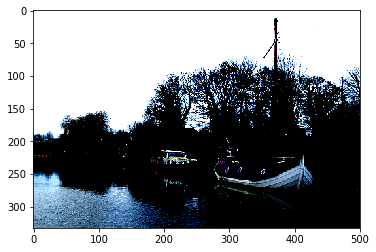

In [34]:
dataiter = iter(valloader)
i, l = dataiter.next()
i, l = dataiter.next()
i, l = dataiter.next()

print(i.shape)
g = torchvision.utils.make_grid(i, nrow=4)

#g = g / 2 + 0.5     # unnormalize
npimg = g.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

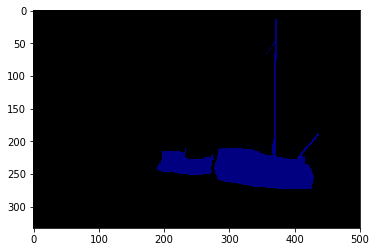

In [35]:
v_loader.decode_segmap(l.numpy().reshape((l.shape[1], l.shape[2])), plot=True)

In [36]:
i[:, 0, :, :] = (i[:, 0, :, :] * 0.229 + 0.485) * 255 - 104.008
i[:, 1, :, :] = (i[:, 1, :, :] * 0.224 + 0.456) * 255 - 116.669
i[:, 2, :, :] = (i[:, 2, :, :] * 0.225 + 0.406) * 255 - 122.675

In [37]:
ig = i.to(device)
out = resnet.forward(ig)

RuntimeError: The size of tensor a (63) must match the size of tensor b (42) at non-singleton dimension 3

In [34]:
for o in out:
    print(o.shape)

torch.Size([1, 21, 42, 63])
torch.Size([1, 21, 42, 63])
torch.Size([1, 21, 22, 32])
torch.Size([1, 21, 42, 63])


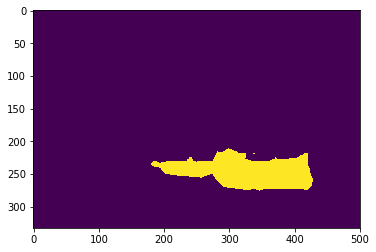

In [35]:
interp = nn.UpsamplingBilinear2d(size=(i.shape[2], i.shape[3]))
output = interp(out[3]).cpu().data[0].numpy()
#output = out[3].cpu().data[0].numpy()
output = output.transpose(1,2,0)
output = np.argmax(output,axis = 2)

# plt.subplot(3, 1, 1)
# plt.imshow(img_original)
# plt.subplot(3, 1, 2)
# plt.imshow(gt)
# plt.subplot(3, 1, 3)
plt.imshow(output)
plt.show()

## Evaluation on the val. set

In [26]:
resnet = resnet.cuda()
resnet.train(False);

In [27]:
def _fast_hist(label_true, label_pred, n_class):
        mask = (label_true >= 0) & (label_true < n_class)
        hist = np.bincount(
            n_class * label_true[mask].astype(int) + label_pred[mask],
            minlength=n_class ** 2,
        ).reshape(n_class, n_class)
        return hist

In [28]:
def eval_img_deeplab(net, i):
    w = i.shape[2]
    h = i.shape[3]
    
    img = np.zeros((1, 3, 513,513));

    i[:, 0, :, :] = (i[:, 0, :, :] * 0.229 + 0.485) * 255 - 104.008
    i[:, 1, :, :] = (i[:, 1, :, :] * 0.224 + 0.456) * 255 - 116.669
    i[:, 2, :, :] = (i[:, 2, :, :] * 0.225 + 0.406) * 255 - 122.675
    
    img[:, :, :i.shape[2],:i.shape[3]] = i

    output = net.forward(torch.from_numpy(img).float().cuda())
    interp = nn.UpsamplingBilinear2d(size=(513, 513))
    output = interp(output[3]).cpu().data[0].numpy()
    
    return output[:,:w,:h]

In [29]:
%%time

n_class = 21
image_count = 0
acc = 0.
cf_matrix = np.zeros(shape=(n_class, n_class), dtype=np.float64)
with torch.no_grad():
    for i, l in valloader:
        i = i.cuda()

        out =  eval_img_deeplab(resnet, i)
        
        out = out.squeeze().transpose(1,2,0)
        out = np.argmax(out,axis = 2)
        
        acc += np.sum(out == l.numpy()) / (i.numel() / 3)
        
        out = out.reshape(-1)
        l = l.numpy().reshape(-1)
        cf_matrix += _fast_hist(l, out, n_class)
        
        image_count += 1
        
        del out
        
        
acc /= image_count
cf_matrix /= np.sum(cf_matrix)
hist = cf_matrix
mean_iu = np.nanmean(np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist)))

/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:225: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.")
/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


CPU times: user 3min 4s, sys: 39.4 s, total: 3min 44s
Wall time: 4min 54s


In [26]:
torch.save([acc, mean_iu, cf_matrix], 'deeplab_v2_eval')

In [30]:
acc

0.9168794980467647

In [31]:
mean_iu

0.6703478721478484